#Продвинутое машинное обучение: ДЗ 1

## Часть I: О теореме Байеса

### Задача 1
#### Условие
Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!
Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.

#### Решение
Имеем события: A -- виновен, B --  редкая группа крови. 
Прокурор говорит про P(B|^A) и, что 1 - P(B|^A) = P(A). Хотя корректно 1 - P(B|^A) = P(^B|^A). Итого 99% вероятность того, что нередкая группа крови и невиновен.

P(B|^A) = (P(B) * P(^A|B)) / P(^A) = (P(B) * 0.99) / (P(^A|B) + 0.99).


### Задача 2
#### Условие
Затем выходит адвокат, объясняет ошибки прокурора и берёт слово сам: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Какие вероятности он оценил, а какие должен был оценить?

#### Решение
Он оценил P(A|B), а должен был P(A), так как это число меньше и может произвести большее впечатление.

На самом деле вероятность того, что он убийца сильно выше, так как прокурор взял под старжу не первого попавшегося с нужной группой крови.

### Задача 3
#### Условие
Вернёмся к тесту на страшную болезнь из первой лекции. Напомню, что по предположениям задачи болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.
Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт положительный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).
Помогите медикам: постройте зависимости апостериорной вероятности болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?

#### Решение

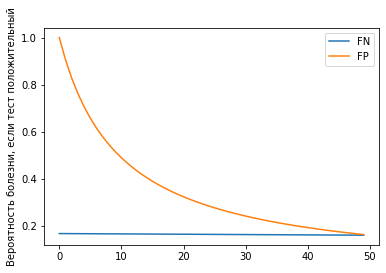

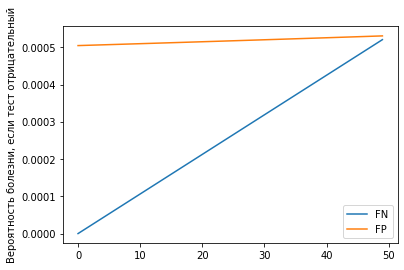

In [20]:
import matplotlib.pyplot as plt


P = 0.01

positive_test = lambda fp, fn: ((1 - fn) * P) / ((1 - fn) * P + fp * (1 - P))
negative_test = lambda fp, fn: (fn * P) / (fn * P + (1 - fp) * (1 - P))
space = [x for x in range(0, 50, 1)]

plt.ylabel("Вероятность болезни, если тест положительный")
plt.plot(space, [positive_test(fp=0.05, fn=x/1000) for x in space], label="FN")
plt.plot(space, [positive_test(fp=x/1000, fn=0.05) for x in space], label="FP")
plt.legend()
plt.show()

plt.ylabel("Вероятность болезни, если тест отрицательный")
plt.plot(space, [negative_test(fp=0.05, fn=x/1000) for x in space], label="FN")
plt.plot(space, [negative_test(fp=x/1000, fn=0.05) for x in space], label="FP")
plt.legend()
plt.show()

Оптимальным является уменьшать FP, так как нам более важно найти больных, чем найти здоровых. Тогда для полодительного теста ошиька первого рода резко уменьшается, а 2го почти не меняется. Для отрицаетльного теста, вообще слабо меняется, но это и не в приоритете.

##Часть II: О линейной регрессии